In [ ]:
# Cette technique consiste à trouver puis sélectionner les variables les plus utiles au développement d'un modèle parmis celle dispo

## C'est un des étapes les plus importantes du pre_processing 

### Car lorsque l'on fournit trop de variables à un modèle, notamment inutile, cela réduit sa performance

# 1) Variance Threshold 

In [1]:
from sklearn.feature_selection import VarianceThreshold

# Permet de sélectionner les variables selon leur degrés de variation ~ selon leur variance

## Calcul la variance de toutes les variables de notre dataset
## Puis élimine les variables dont la variance est inférieur à un certain seuil que nous définissons

### Le but est d'éliminer les variables qui ne varient que très peu

#### En effet, à quoi servirait une variable qui ne varie pas, à l'extrême une constante est inutile

##### Ainsi, fournir la variable 'Paris' à notre modèle estimant le prix d'appartement mais uniquement à Paris réduirait juste son
#####        efficacité
               # Dès qu'on lui fournirait une autre ville, il serait perdu


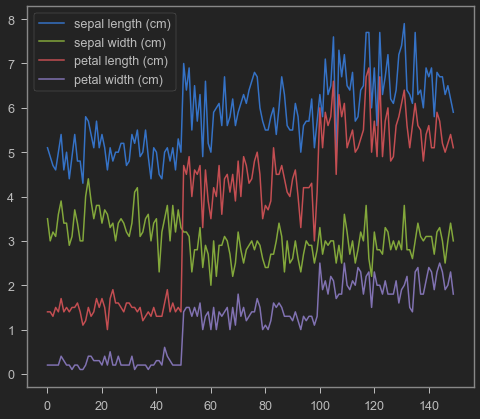

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

# On peut voir sur la dataset 'iris' que certaines variables varient très peu, 'setal_width'

In [3]:
# On va alors utiliser le 'transformer' VarianceThreshold afin d'éliminer cette variable si sa variance est bien inférieur au seuil
# que nous définirons 

# On peut commencer par regarder rapidement la variance de chacune de nos variables 

X.var(axis =0)

# On remarque bien que la variance de notre seconde variable, 'setal_width' est bien plus faible que les autres 

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [4]:
# On créer donc un 'selector' qui va être notre transformer

selector = VarianceThreshold(threshold=0.2)

selector.fit_transform(X)

# Une variable à bien été filtré mais ce n'est pas très clair laqelle est - ce

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [5]:
 # On utilise alors la méthode get_support, qui nous retourne un Booléean nous indiquant quelles sont les variables "selectionnées"
    
selector.get_support()

array([ True, False,  True,  True])

In [6]:
# Comme on obtien un Bouléan, on peut donc faire du Booléan indexing

## Il suffit de récuperer le nom de nos variables et de lui appliquer notre masque 

np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

# 2) SelectKBest 

In [7]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Ce transformer séléctionne les K variables X dont le score de test de dépendance avec y est le plus élevè

## Il existe en stat beaucoup de test de dépendance, par exemple : 

    # Le test du Khi-deux, d'ANNOVA pour comparer des variables catégorielles
    # La corrélation de Pearson dans le cas d'une régression 

In [8]:
chi2 (X,y)

# Dans le premier tableau ou va retrouver le score du test K2, plus il est elevé, plus il y a une dépendance entre notre X et y

## On voit ici que y dépend beaucoup de la 3e variable avec un score de 116

### Dans le 2e tableau on retrouve les valeurs de probabilités, les p_values 

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [27]:
# Pour revenir à notre 'tranformer' : 

## SelectKBest va sélectionner dont le score, (la valeur du premier tableau) est le plus elevé (dans le cas où k=1)

selector = SelectKBest(chi2, k=1)


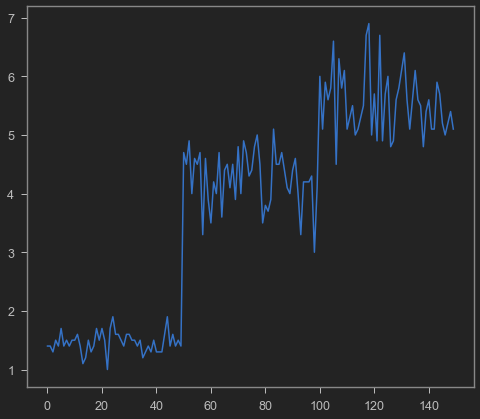

In [28]:
# Puisque le test de Khi_deux a besoin de X & y, on rentre cette fois les deux valeurs dans notre fit_tranform
import matplotlib.pyplot as plt
plt.plot(selector.fit_transform(X, y))

# Cela nous retourne alors une unique variable

In [ ]:
# Pour déterminer de laquelle il s'agit, on ré_utilise notre fonction 'get_support'

In [29]:
np.array(iris.feature_names)[selector.get_support()]

# Il s'agit bien de notre '3e' variable, petal_length

array(['petal length (cm)'], dtype='<U17')

# 3) Les autres Transformer 

## Selecter_Percentile

In [ ]:
# Ne va choisir un nombre de variable 

## Selectionne toutes les variables avec un score au_dessus d'un certain seuil que nous définissons 

## Et d'autres qui selectionnent sur les p_value plutôt que sur les 'score'

# 4) SelectFromModel

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

# Il s'agit de pré-entrainer un estimateur à partir de TOUT notre dataset et d'examiner ses coefficients pour ensuite conclure
# quelles sont les variables importantes pour notre estimateur 

## Il faut donc faire appel à un estimateur qui développe des coefficients (Résaux_de_neurones / Régression_linéaire)
## Soit un à un estimateur qui calcul l'importance des variables pendant leur création (Random_foreest / Arbre_de_décision)

### Ainsi, des estimateurs comme les KNearestNeighbors seront complétement incompatibles car ils ne développent jamais de coefficients
### Ce sont ne sont pas des modèles paramétrés mais qui retiennent en mémoire tous les échantillons fournis

In [35]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')

# Cet estimateur est développé sur (X, y), il aura donc développé des coefficients

## Ensuite, pour sélectionner les variables les plus importantes, il faut utliser un treshold 


In [36]:
# Comme toujours, il ne reste plus qu'à développer notre 'transformer', avec la méthode 'fit'

## Encore une fois, nous avons besoin de X & y, car notre estimateur est estimé sur ces variables 

selector.fit_transform(X, y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [38]:
# Il semble donc que deux variables ai été sélectionnées,

## On utlise get_support et le Booléan Indexing pour savoir quelles sont ces variables 

np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

# 5) Recursive Feature Elimination ~ RFE & RFECV 

In [39]:
from sklearn.feature_selection import RFECV, RFE

# Permettent de sélectionner des variables  en se basant sur les coefficients d'un estimateur mais en entraînant cette estimateur
# en boucle, de façon "récursive"

## Le principe est pratiquement le même


In [ ]:
# On va donc commencer par entrainer un estimateur sur notre dataset

## On va évaluer ses coefficients 

### Puis on va éléminier une ou plusieurs variables, celles qui sont les plus faible pour cet estimateur


In [ ]:
# Puis, pour les variables qui nous restent, on va ré-entraîner cet estimateur

## On va a nouveau examiner les coefficients de chaque variables,

### Puis encore une fois éliminer certaines variables


In [ ]:
# On ré_itère la procédure jusqu'à avoir un nombre de variable qui nous convient 


In [40]:
# 1 _ On sélectionne un estimateur, pour faire simple on conserve SGDClassifier

## 2 _ On définit un nombre de variable à éliminer à chaque itération  (step=)

### 3 _ On peut également indiquer combien de variable on désire avoir à la fin (min_features_to_select=)

#### 4 _ Dans le cas de RFECV, on indique un nombre de split (CV=)

#### 5 _ On entraîne notre estimateur

selector = RFECV (SGDClassifier(), step=1, min_features_to_select=2, cv=4)

selector.fit(X, y)

RFECV(cv=4, estimator=SGDClassifier(), min_features_to_select=2)

In [41]:
# On peut alors utiliser deux arguments très utiles

# 1 _ L'argument ranking, qui va nous permettre de voir le classement final de nos différentes variables 

selector.ranking_

# Ici, nos trois dernières variables sont à la première place, elles ont  ex_aequo en terme d'importance 
#      tandis que notre première variable est à la 2e place, elle a donc été éliminer 


array([2, 1, 1, 1])

In [42]:
# 2 _ L'argument grid_score, qui quant à lui nous indique le score de SGDClassifier à chaque itération de notre RFECV

selector.grid_scores_

# Cela nous indique alors que la première fois que notre SGDClassifier a été entraîné, càd sur toutes nos variables, il a obtenu
# un score de 0,84%

## Il a ensuite éliminé une variable, et a alors obtenu un score de 0,87%

### Ensuite il a encore éliminé une variable, et a obtenu moins : 0,82% 

#### C'est pour ça qu'on finit avec plus que les 2 variables minimum demandées mais avec 3.  

array([0.8390825 , 0.87375533, 0.82681366])